#Uso de algorítmos não supervisionados - EXEMPLO DE LÓGICA ESTILO FUZZY - AGRUPAMENTO PARTICIONADO
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/


In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv"
filmes = pd.read_csv(url)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Renomear colunas

In [0]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Limpar dados - separar generos

In [0]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Como melhorar os dados? Dar pesos para cada categoria de genero - Usar sklearn e preprocessamento de dados desta biblioteca

In [0]:
from sklearn.preprocessing import StandardScaler #Biblioteca StandardScaler permite escalar dados para termos uma ordem sequencial ou de peso entre eles, mesmo que sejam dados do tipo booleano. 
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados.shape

(9742, 20)

# Exemplo de uso do KMeans - Técnica de clusterização (fuzzy)

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)
#print('Grupos {}'.format(modelo.labels_)) #DUAS FORMAS DE FAZER
print(f'Grupos {modelo.labels_}')

Grupos [2 2 0 ... 0 2 0]


# Melhorando nossos crupos / clusters.

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)
#print('Grupos {}'.format(modelo.labels_)) #DUAS FORMAS DE FAZER
print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


#Para mostrar os grupos, usamos o cluster_centers_ do modelo.
Perceberemos uma lista de números, exatamente 20 números em cada cluster, sendo que são referentes aos generos de filmes.
Cada número é a proporção de ocorrência de determinado gênero em cada cluster. Quanto maior o número, mais próximo do determinado gênero o grupo está.

In [0]:
print(generos.columns)
print(modelo.cluster_centers_) #Mostra o centro de cada grupo (neste caso, ainda agrupado em 3 clusters para todos os gêneros de fimes)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02  3.89903332e-01 -2.57043850e-01 -2.31721822e-01
  -2.57483983e-01 -2.24774737e-01  2.56235397e+00 -1.97818630e-01
   1.80858743e-01 -2.40591841e-01  6.43233283e-01 -1.70938911e-01
  -7.01857818e-02 -1.52499076e-01  3.81988487e-01 -2.52798362e-01
  -2.69247418e-01  7.28810908e-01 -1.59927955e-01 -6.28293696e-02]
 [ 2.72176320e-02 -2.79862980e-01 -3.03862172e-01 -2.24066473e-01
  -1.91365241e-01  1.09991953e-01 -3.74631584e-01  9.49748520e-02
   1.27732133e-01 -1.73812575e-01 -9.49256298e-02  1.70029352e-02
  -1.16533244e-01 -2.29016088e-03 -5.06286548e-02  1.27858262e-01
  -2.46749823e-01 -1.35690607e-01  5.04475904e-02  1.57125127e-02]
 [-5.91799474e-02  7.53541457e-01  1.26953601e+00  9.641317

# Deixando a visualização mais fácil


In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)

In [0]:
grupos = grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc02e82e780>,
      dtype=object)

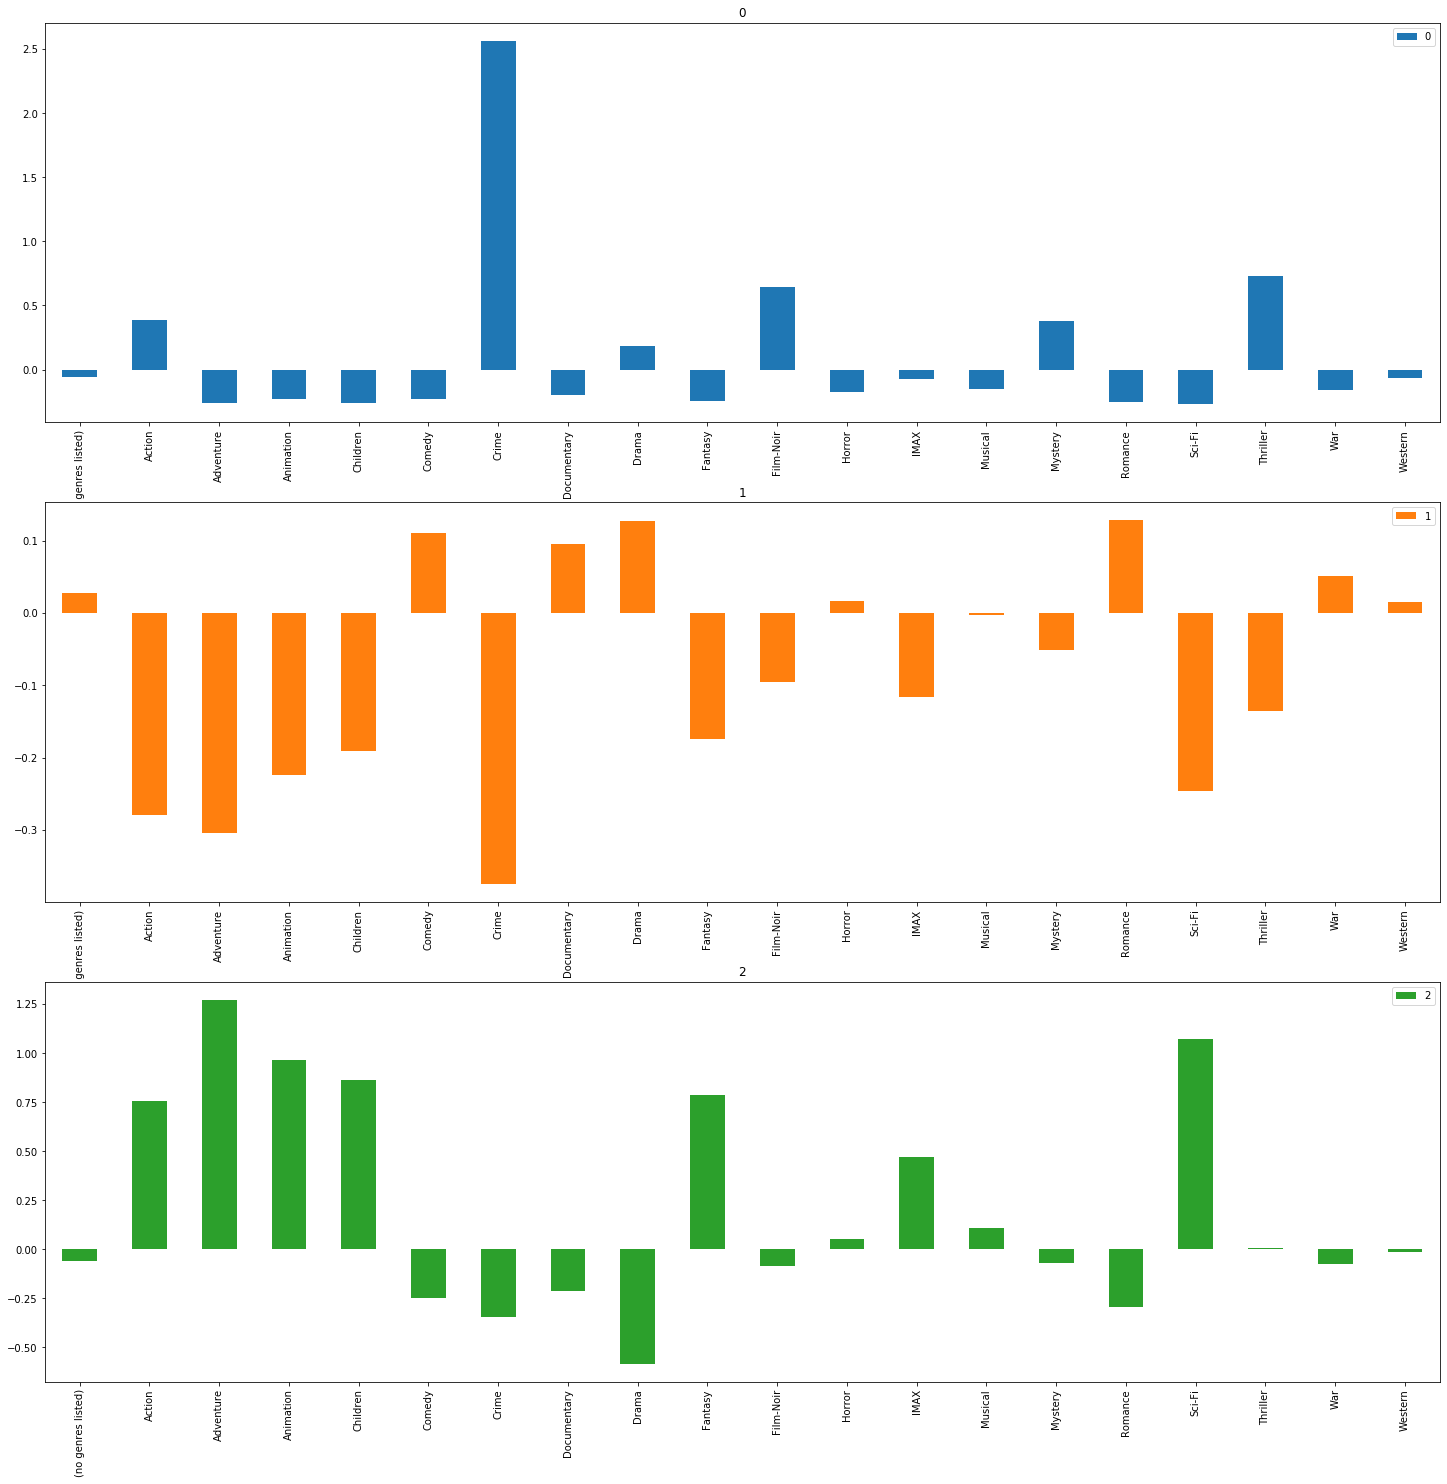

In [0]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [0]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
868,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9700,185031,Alpha (2018),Adventure|Thriller,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2734,3672,Benji (1974),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
549,653,Dragonheart (1996),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9288,158388,Buck Rogers in the 25th Century (1979),Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1597,2139,"Secret of NIMH, The (1982)",Adventure|Animation|Children|Drama,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1926,2554,Children of the Damned (1963),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
5458,26133,"Charlie Brown Christmas, A (1965)",Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
642,828,"Adventures of Pinocchio, The (1996)",Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2549,3412,"Bear, The (Ours, L') (1988)",Adventure|Children|Drama,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#Usar a distribuição estatística (processoestocástico) t-distributed Stochastic Neighbor Embedding (T-SNE) para reduzir as dimensões do problema para 2 dimensões, para permitir visualização gráfica.

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

In [0]:
visualizacao

array([[-24.055326, -28.43355 ],
       [-50.32576 ,  30.342884],
       [ 28.197884, -24.318357],
       ...,
       [  6.653604,  -7.247983],
       [-34.529568, -11.08066 ],
       [-25.15948 ,  10.784963]], dtype=float32)

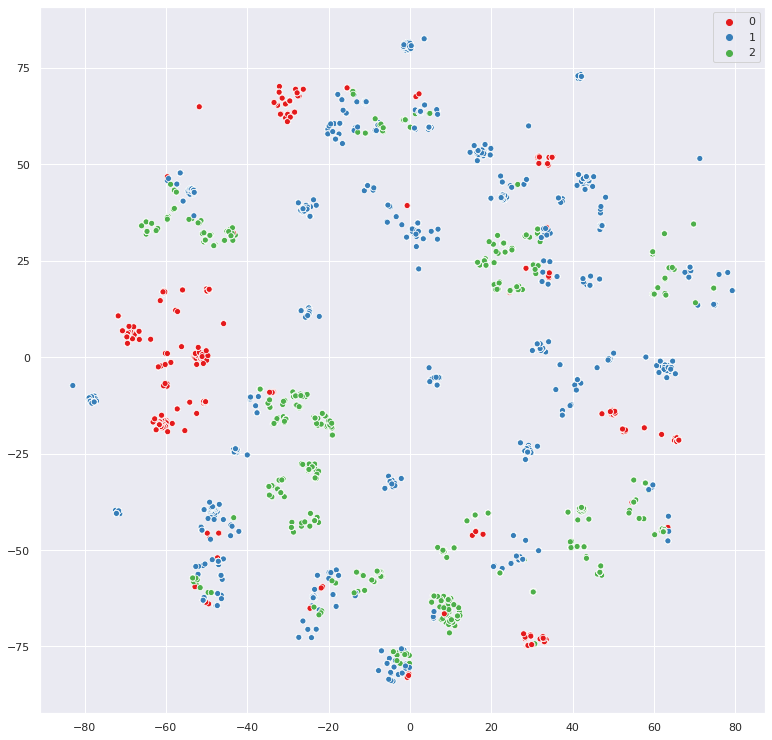

In [0]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (13, 13)})
sns.scatterplot(x = visualizacao[:,0],
               y = visualizacao[:,1],
               hue = modelo.labels_,
               palette = sns.color_palette('Set1', 3))

# Exemplo de visualização dos centroides:

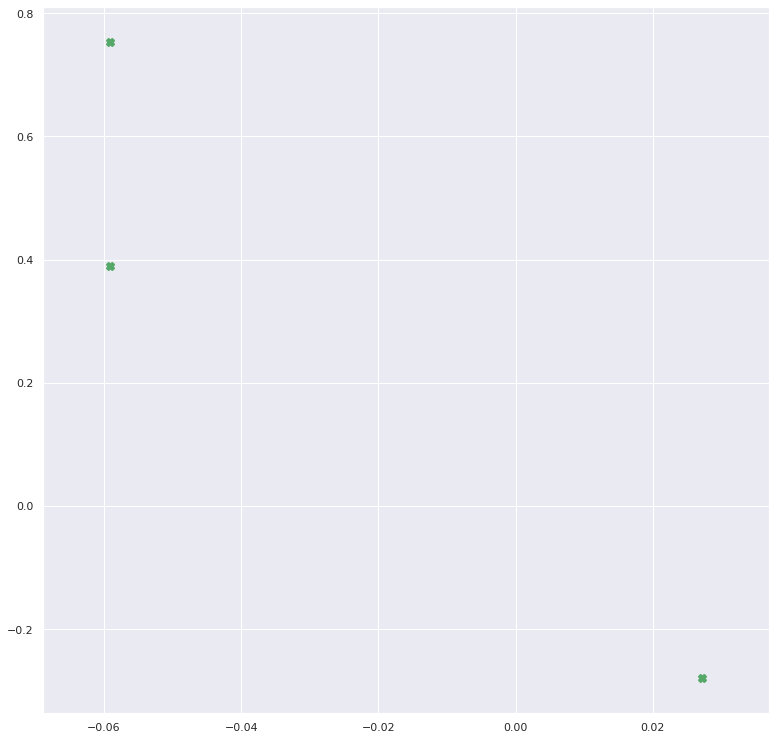

In [0]:
import matplotlib.pyplot as plt
centroides = modelo.cluster_centers_
#plt.scatter(x=visualizacao[:,0], y=visualizacao[:,1], s=2)
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=50, linewidths=2,
           color='g', zorder=8)

# Melhorando o algorítmo!

In [0]:
modelo = KMeans(n_clusters = 20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,2.070658,0.565514,-0.258679,-0.270451,-0.175761,-0.374632,-0.217489,-0.233839,-0.294810,-0.094926,-0.327531,-0.128397,-0.188419,-0.249986,-0.278404,-0.334435,0.415433,-0.202020,-0.132065
1,-0.05918,-0.480607,-0.248851,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.969680,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.007316,-0.202020,-0.132065
2,-0.05918,0.513468,-0.233283,-0.258679,-0.270451,-0.152773,2.669289,-0.217489,0.234194,-0.286216,-0.094926,-0.314664,-0.128397,-0.188419,-0.249986,-0.310376,-0.311186,0.672032,-0.202020,-0.132065
3,-0.05918,-0.146991,1.315176,3.865793,3.697524,0.321475,-0.285105,-0.217489,-0.756600,0.774060,-0.094926,-0.320074,-0.128397,0.157951,-0.196412,-0.283702,-0.082998,-0.491259,-0.158725,-0.132065
4,-0.05918,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc029b8cef0>,
      dtype=object)

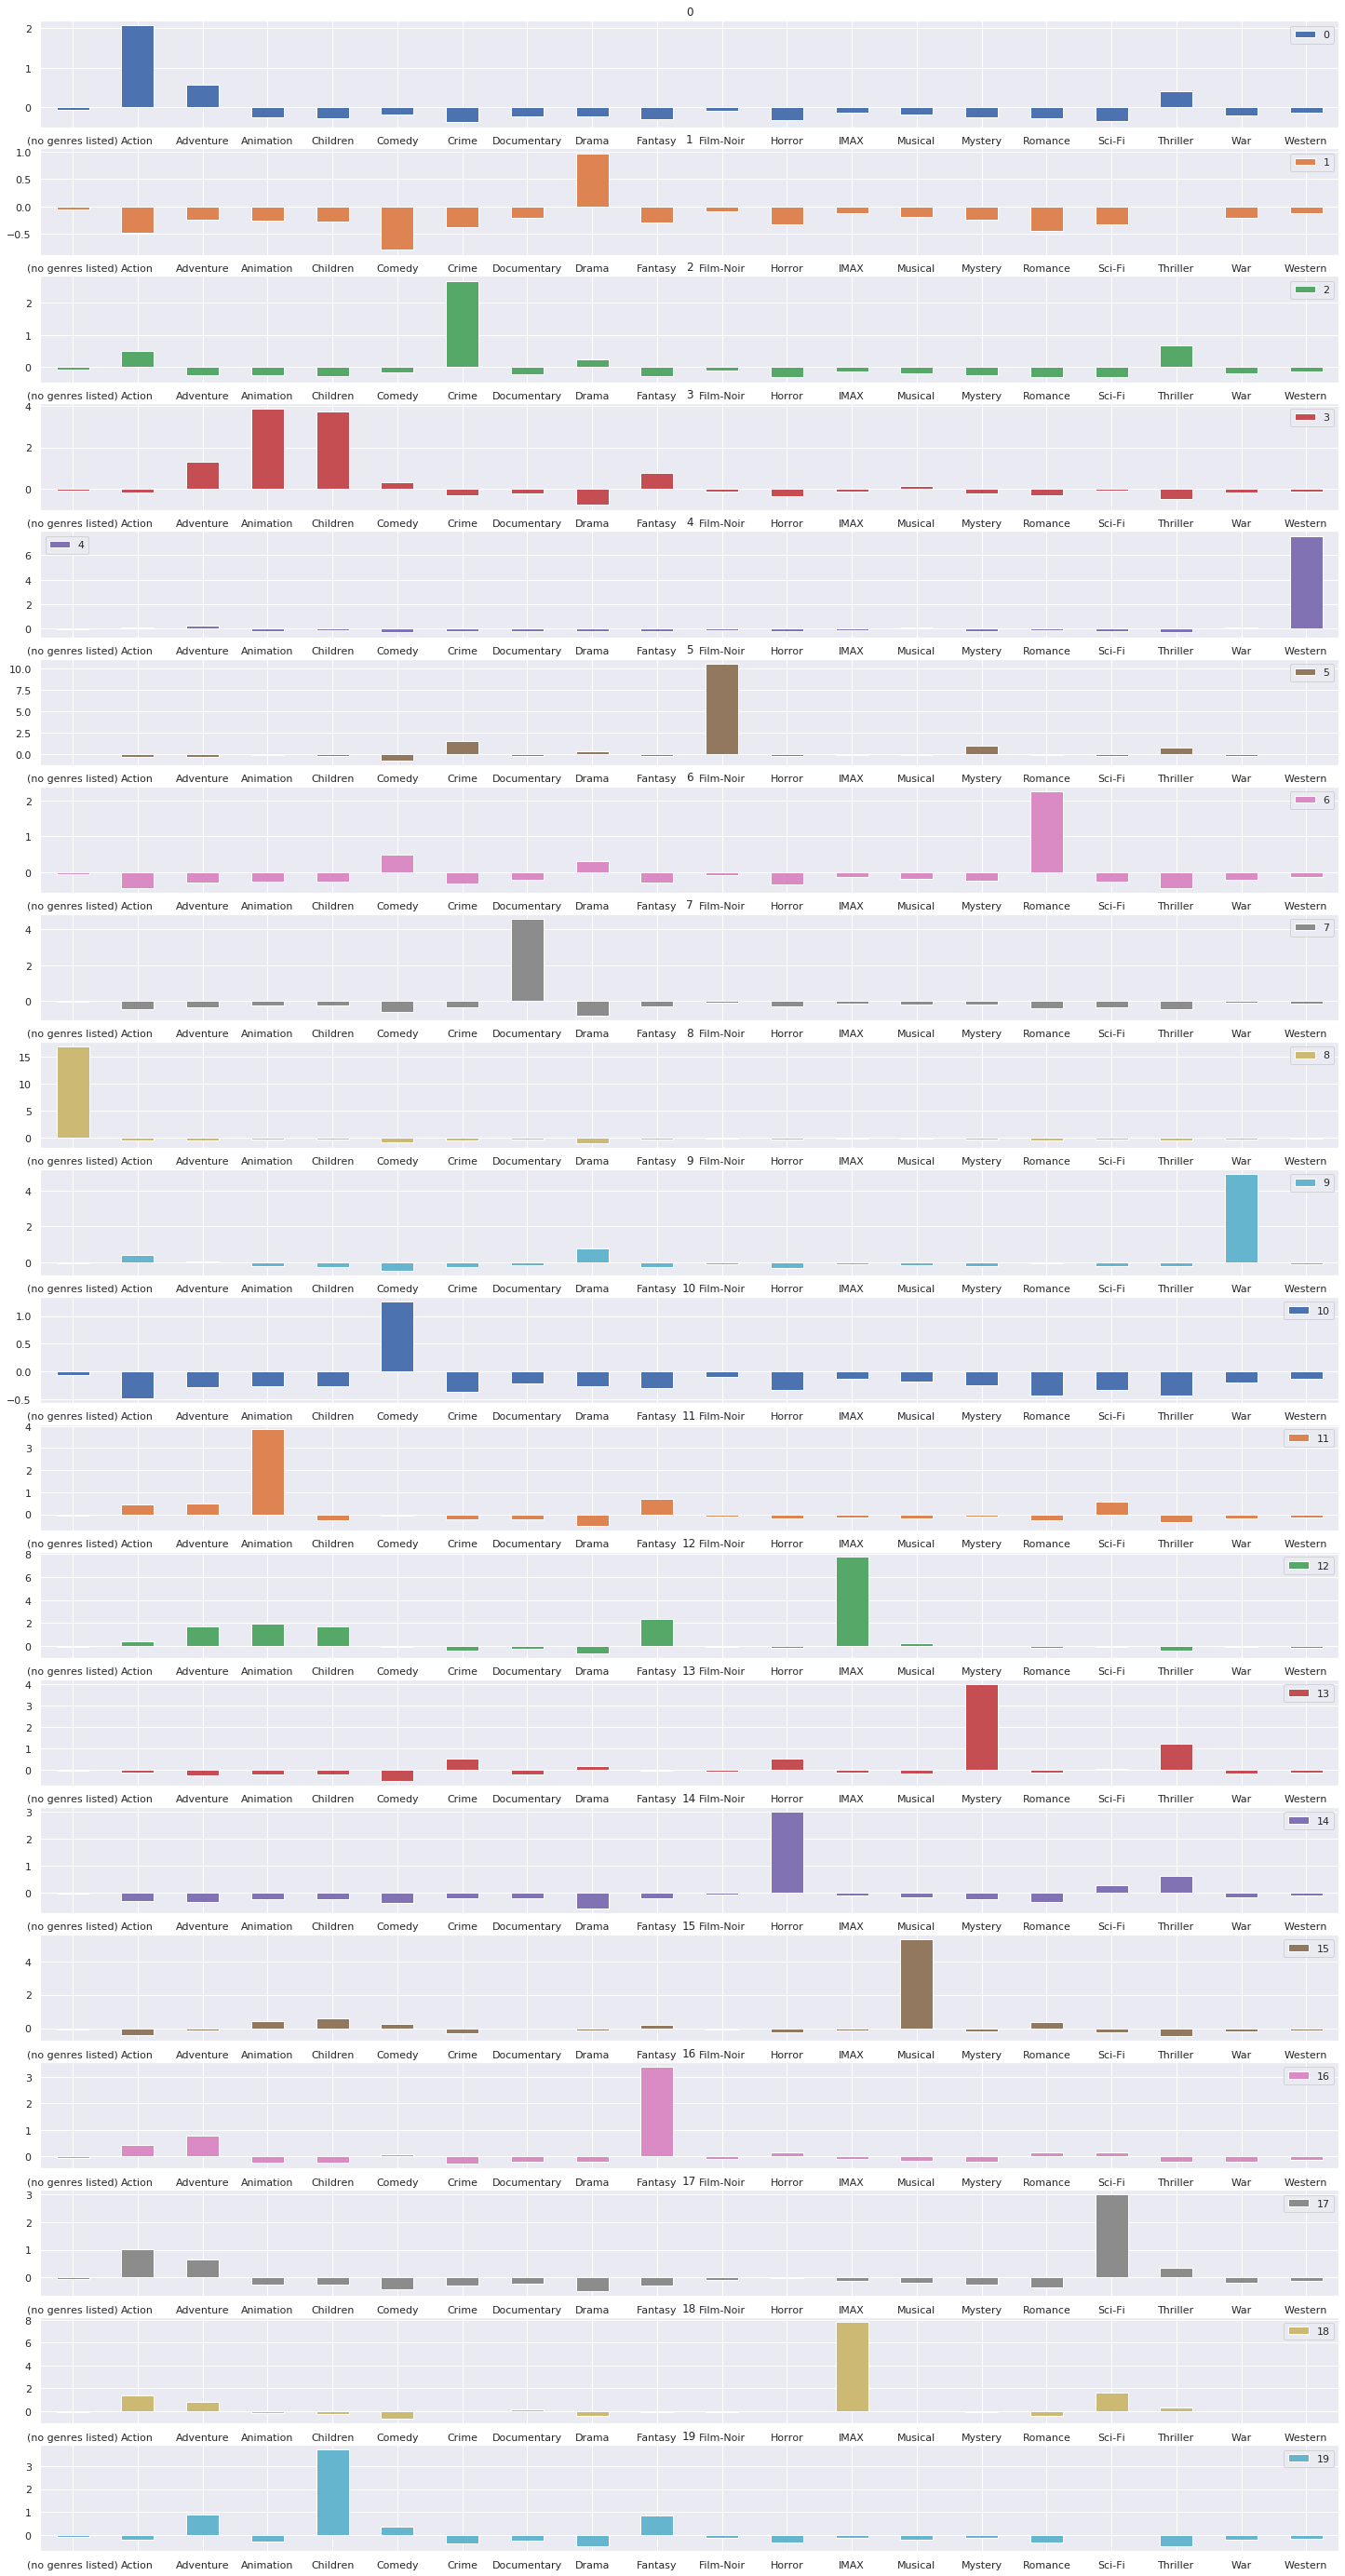

In [0]:
grupos.transpose().plot.bar(subplots = True,
                           figsize = (25, 50),
                           sharex = False,
                           rot=0)

In [0]:
grupo = 3
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1757,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5342,8907,Shark Tale (2004),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9708,187541,Incredibles 2 (2018),Action|Adventure|Animation|Children,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8273,105468,Cloudy with a Chance of Meatballs 2 (2013),Animation|Children|Comedy|Fantasy,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8587,117444,Song of the Sea (2014),Animation|Children|Fantasy,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8806,130520,Home (2015),Adventure|Animation|Children|Comedy|Fantasy|Sc...,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1505,2033,"Black Cauldron, The (1985)",Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8342,107999,Dragon ball Z 04: Lord Slug (1991),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1930,2559,"King and I, The (1999)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016,2687,Tarzan (1999),Adventure|Animation|Children|Drama,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#Como saber quantos clusters seria o ideal para cada tipo de problema?
No nosso exemplo, temos 20 gêneros diferentes de filmes que foram agrupados em 3 clusteres e depois em 20 clusteres. Qual gera o melhor resultado se eu quiser indicar algum filme para algém que acabou de assistir um dos filmes desta lista?

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters = numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
kmeans(1, generos_escalados)

[1, 194840.0]

In [0]:
kmeans(3, generos_escalados)

[3, 167741.71922054506]

In [0]:
kmeans(10, generos_escalados)

[10, 104097.40127531969]

In [0]:
kmeans(20, generos_escalados)

[20, 55397.29853633931]

In [0]:
kmeans(60, generos_escalados)

[60, 27124.588314653094]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166292.33599796717],
 [4, 158069.85066066126],
 [5, 146154.4314393844],
 [6, 138879.2082913265],
 [7, 126502.83729599137],
 [8, 120173.35388818319],
 [9, 110317.29561598532],
 [10, 101136.72492980018],
 [11, 96517.57316095091],
 [12, 86263.5886381736],
 [13, 78685.28243646675],
 [14, 74476.31559999581],
 [15, 68359.5623166176],
 [16, 63101.1789605878],
 [17, 60838.05655374955],
 [18, 60027.81399746656],
 [19, 56981.50548115732],
 [20, 54935.772767301016],
 [21, 54659.837104799335],
 [22, 51480.7438669926],
 [23, 51187.798571727304],
 [24, 49842.121164048265],
 [25, 47726.83431823281],
 [26, 47622.009315707204],
 [27, 45072.64321102661],
 [28, 44789.059836032604],
 [29, 43601.33567697759],
 [30, 43023.381472820976],
 [31, 42351.476086190494],
 [32, 40496.82567372161],
 [33, 39186.76247448311],
 [34, 40050.76202430951],
 [35, 38824.58785199395],
 [36, 38287.1681950474],
 [37, 37367.31947057501],
 [38, 36964.71028063694],
 [39, 35876.11390398

In [0]:
resultado = pd.DataFrame(resultado,
            columns = ['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,166292.335998
3,4,158069.850661
4,5,146154.431439
5,6,138879.208291
6,7,126502.837296
7,8,120173.353888
8,9,110317.295616
9,10,101136.724930


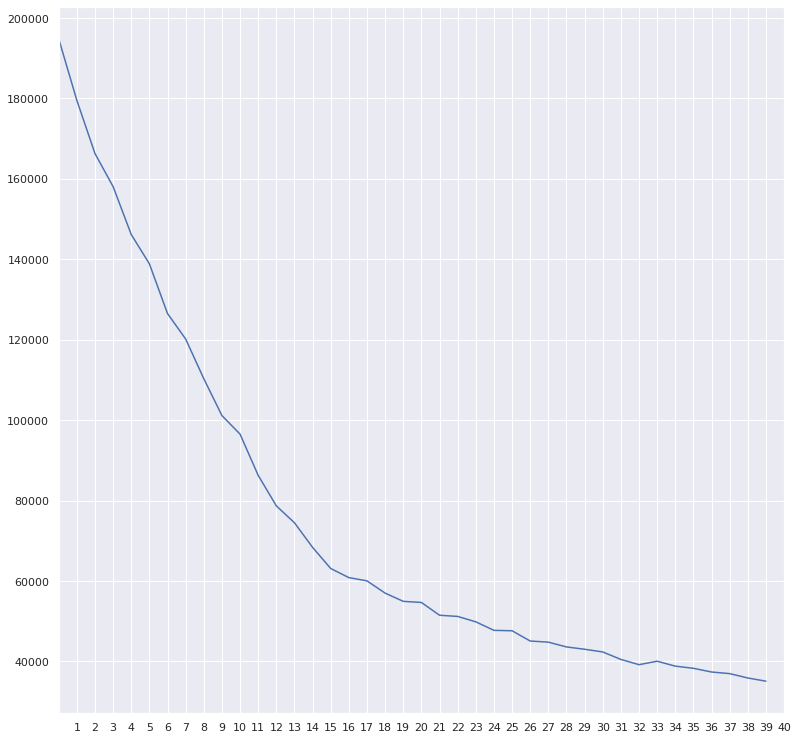

In [0]:
resultado.inertia.plot(xticks = resultado.grupos) #inertia retorna o erro quadrado médio.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc028afdf98>,
      dtype=object)

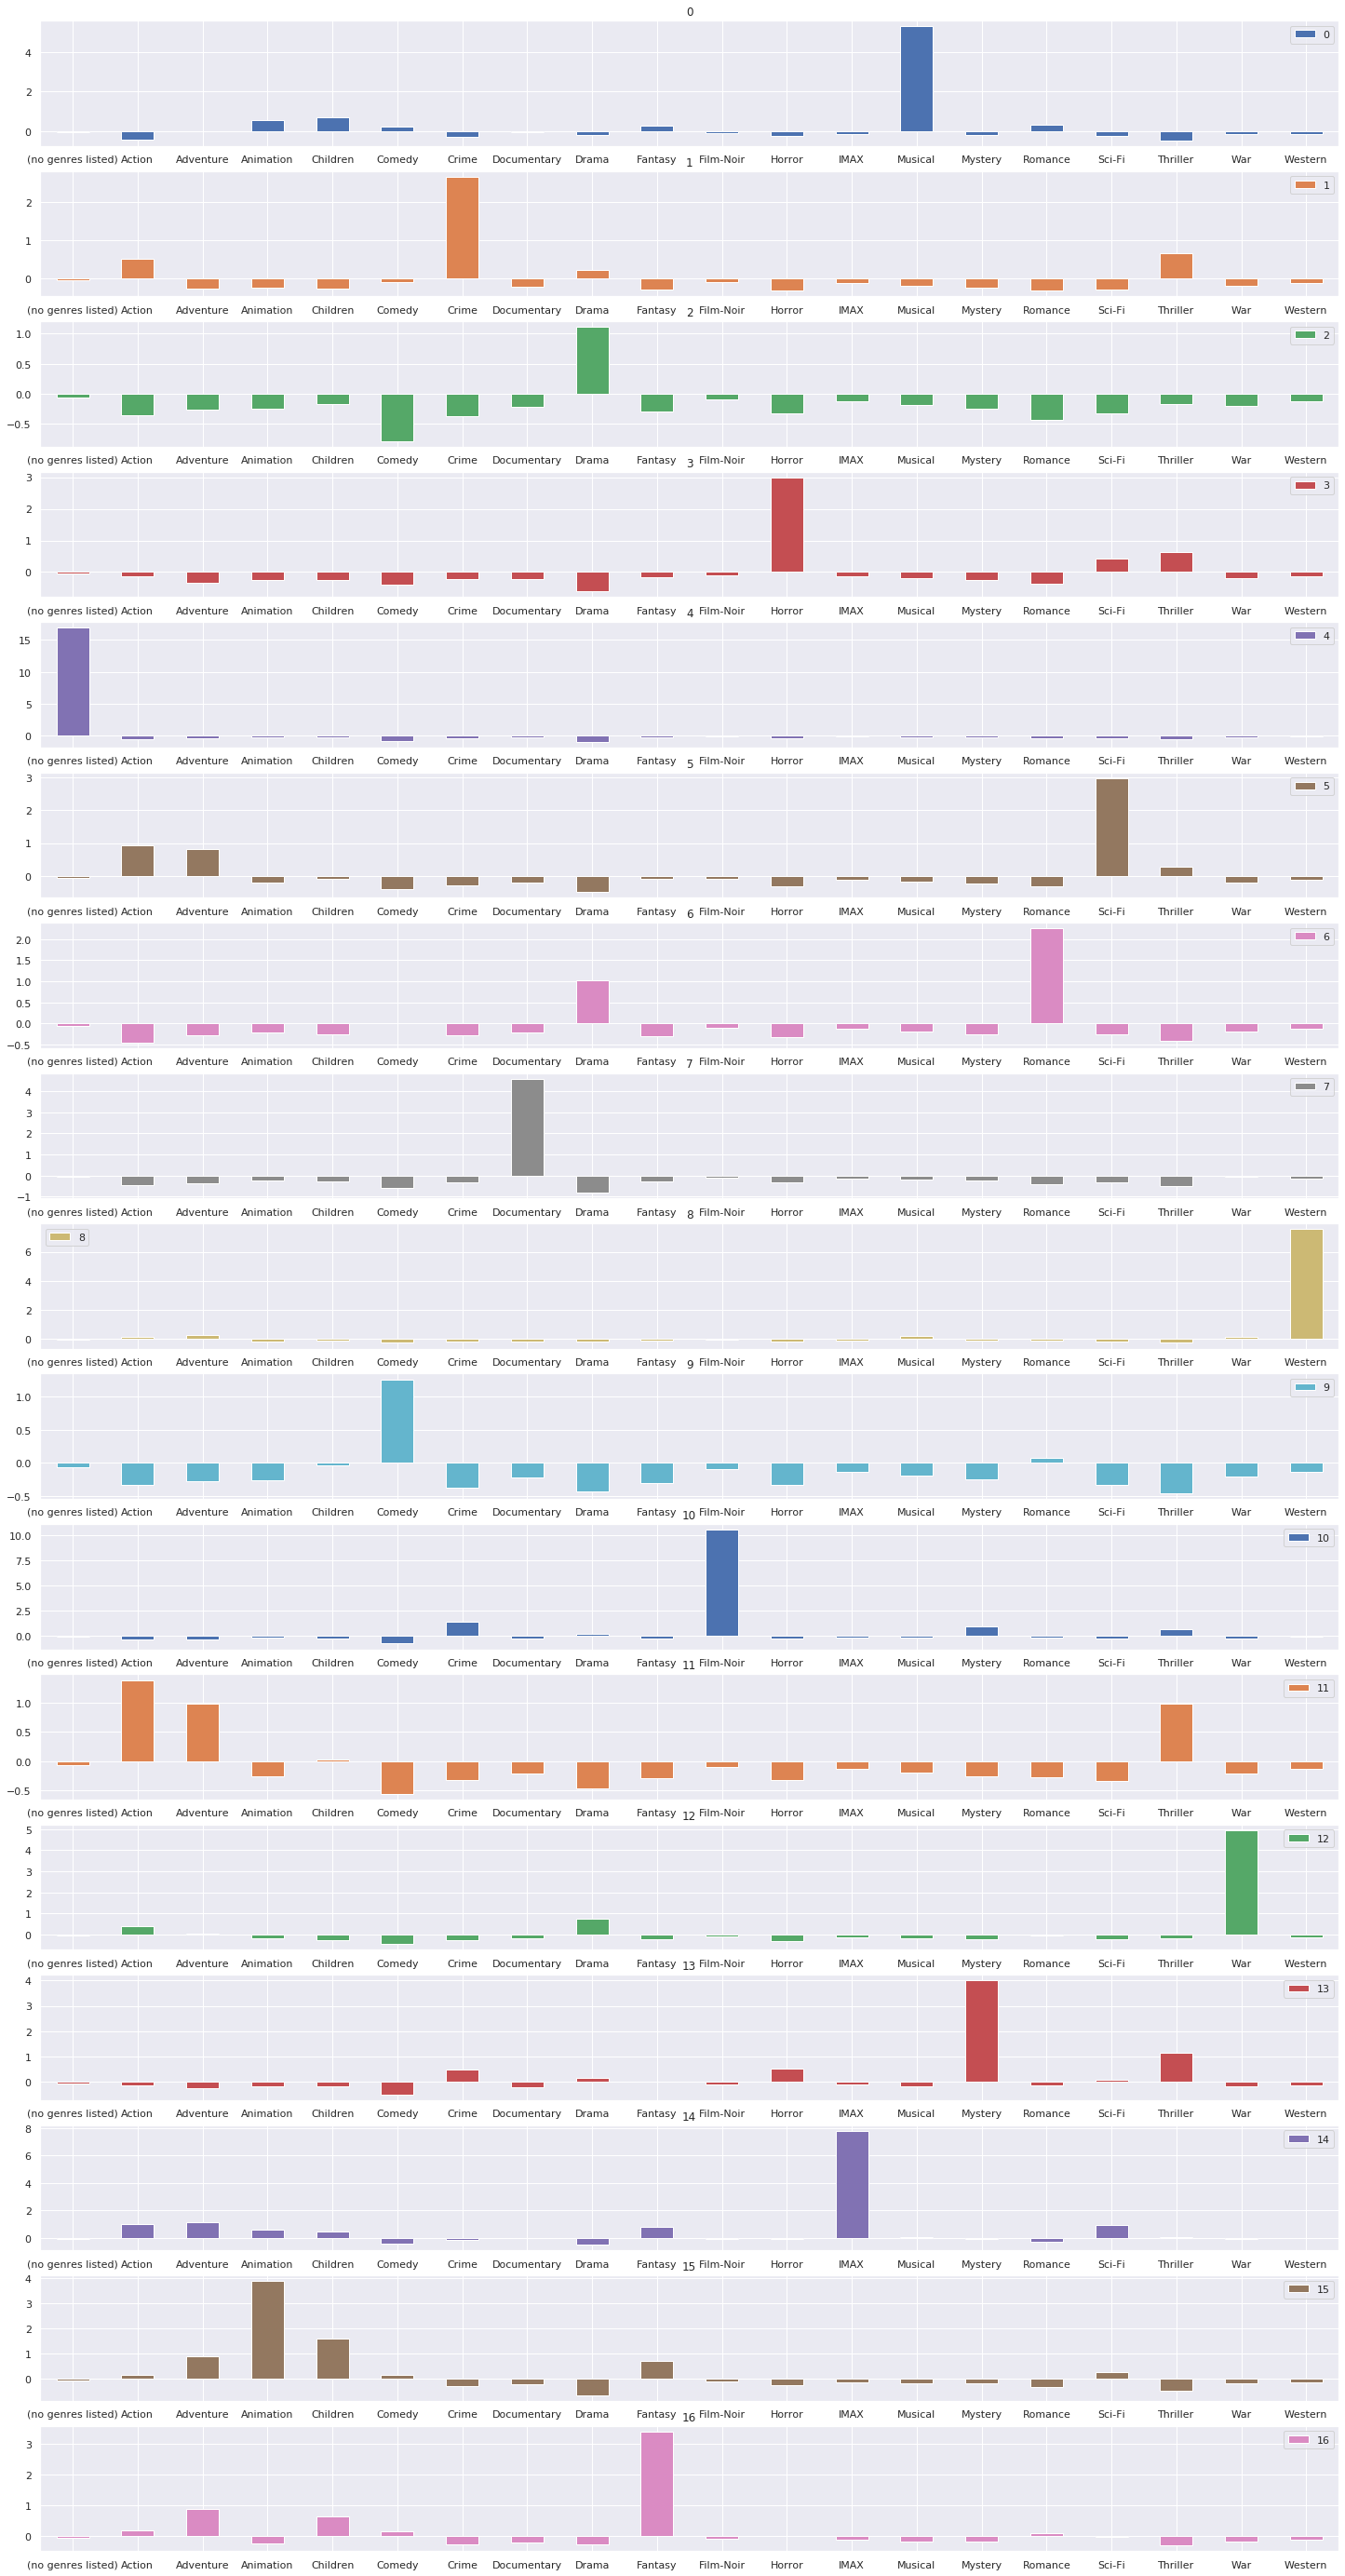

In [0]:
modelo = KMeans(n_clusters = 17)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                           figsize = (25, 50),
                           sharex = False,
                           rot = 0)

In [0]:
grupo = 1

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4636,6920,"Cercle Rouge, Le (Red Circle, The) (1970)",Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
454,519,RoboCop 3 (1993),Action|Crime|Drama|Sci-Fi|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
3809,5333,Bob le Flambeur (1955),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6767,59995,Boy A (2007),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4451,6572,Scorched (2003),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7895,94985,Get the Gringo (2012),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
919,1218,"Killer, The (Die xue shuang xiong) (1989)",Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5818,32029,Hostage (2005),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1399,1918,Lethal Weapon 4 (1998),Action|Comedy|Crime|Thriller,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1687,2268,"Few Good Men, A (1992)",Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


#Agrupamento Hierárquico
Muito usado para analisar textos e correlações entre palavras.


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters = 17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-45.73591  ,  -8.944056 ],
       [ 28.625484 , -18.525564 ],
       [ 14.642812 ,  42.63536  ],
       ...,
       [  3.3032665, -12.450941 ],
       [-28.073606 ,  -0.780956 ],
       [ -8.81035  ,  24.146729 ]], dtype=float32)

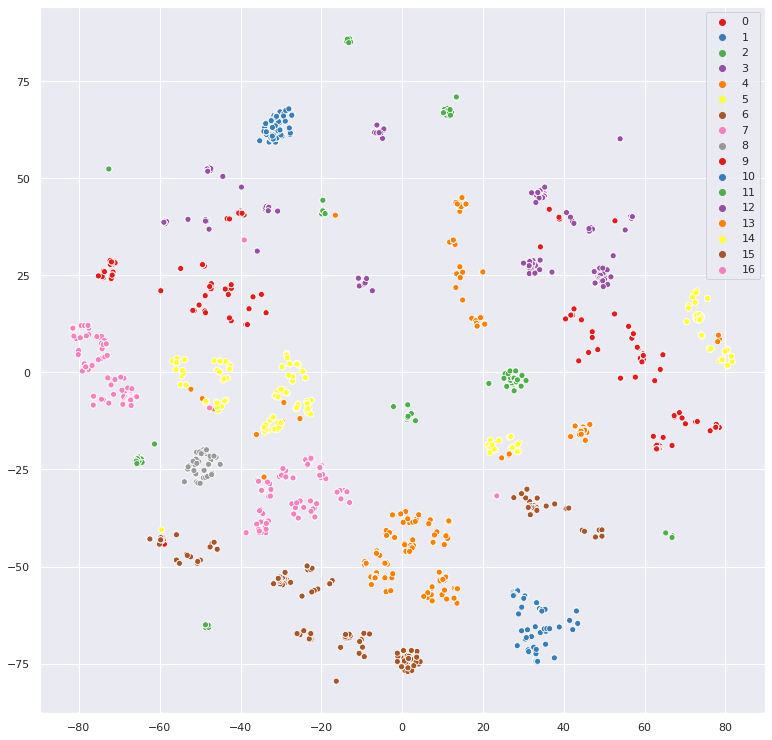

In [0]:
sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:, 1],
               hue = grupos,
               palette = sns.color_palette('Set1', 17))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage #importa gráficos de árvore (dendrogramas) e distâncias entre clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc027e42b38>,
      dtype=object)

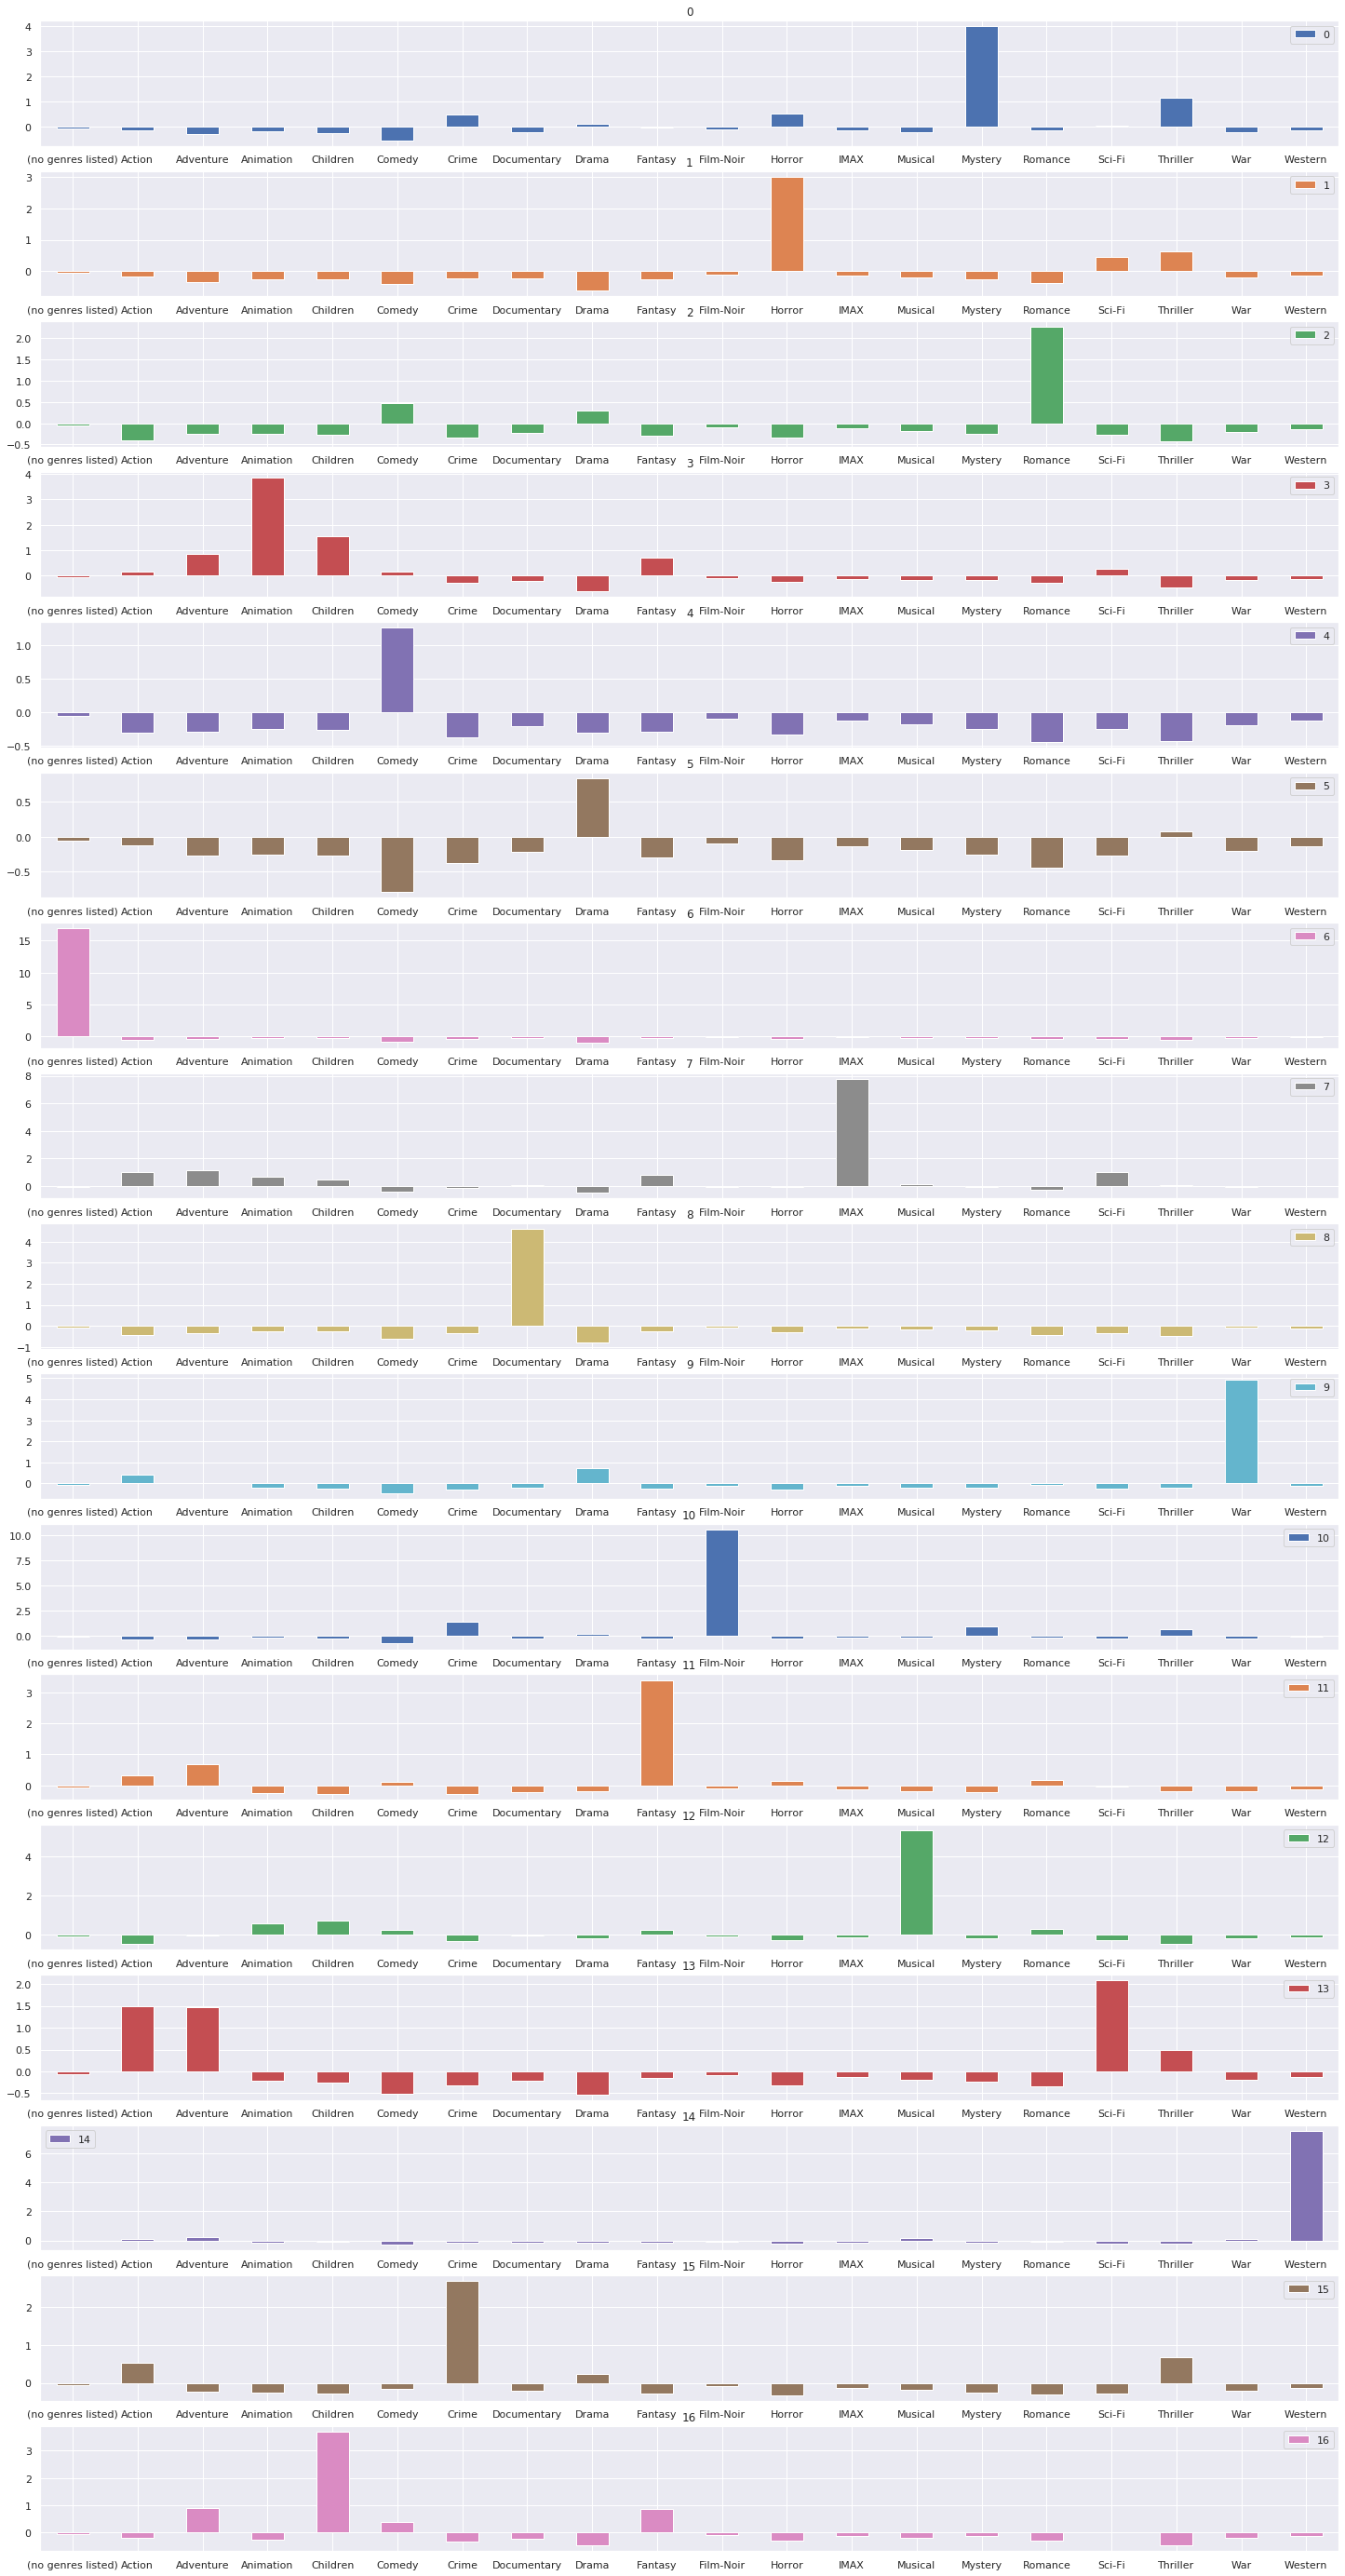

In [0]:
modelo = KMeans(n_clusters = 17)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                           figsize = (25, 50),
                           sharex = False,
                           rot = 0)

In [0]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 4.        ,  5.        ,  2.41569464,  2.        ],
       [ 2.        , 17.        ,  2.8838536 ,  3.        ],
       [15.        , 18.        ,  3.28888583,  4.        ],
       [13.        , 19.        ,  3.64628569,  5.        ],
       [ 1.        , 20.        ,  3.76760954,  6.        ],
       [11.        , 21.        ,  4.12619503,  7.        ],
       [16.        , 22.        ,  4.40573328,  8.        ],
       [ 0.        , 23.        ,  4.64563625,  9.        ],
       [ 3.        , 24.        ,  4.67841865, 10.        ],
       [ 8.        , 25.        ,  5.13869584, 11.        ],
       [ 9.        , 26.        ,  5.22215593, 12.        ],
       [12.        , 27.        ,  5.82700162, 13.        ],
       [14.        , 28.        ,  7.84386136, 14.        ],
       [ 7.        , 29.        ,  8.17718078, 15.        ],
       [10.        , 30.        , 10.81560737, 16.        ],
       [ 6.        , 31.        , 17.06002113, 17.        ]])

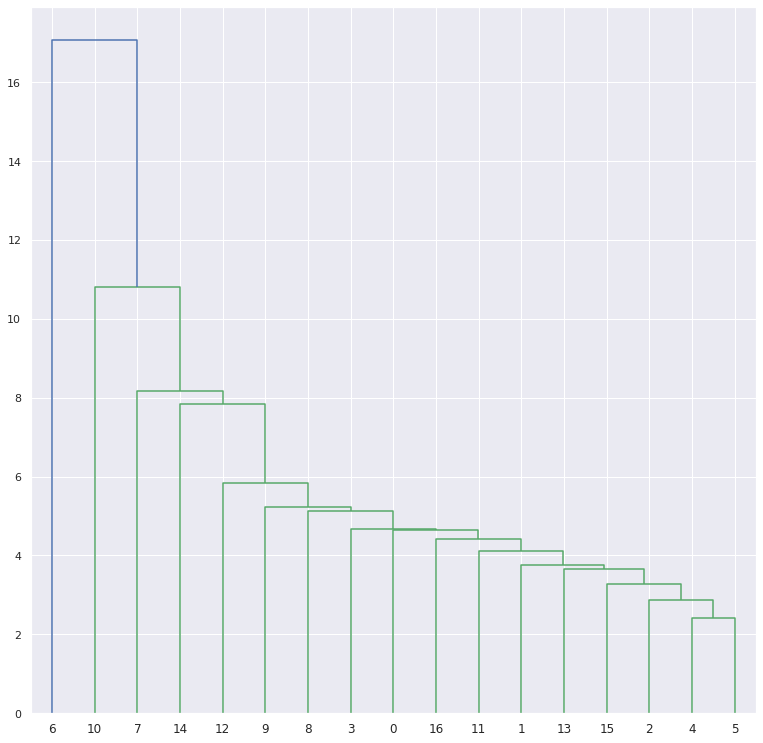

In [0]:
dendrograma = dendrogram(matriz_de_distancia)


# Teste do DBSCAN neste set de dados:

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
modelo_teste = DBSCAN()
grupos_teste = modelo_teste.fit_predict(generos_escalados)

In [0]:
modelo_teste.labels_.max()

235

In [0]:
set(modelo_teste.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

# Conclusão, a distribuição dos dados precisa ser verificada antes da escolha do método de clusterização, para que não ocorram erros de classificação

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 69.919464,  -2.263637],
       [ 20.413336,   9.46612 ],
       [-18.479374, -33.736687],
       ...,
       [ 13.78992 , -15.99927 ],
       [ 60.471664, -25.612688],
       [ -6.977665,  11.286011]], dtype=float32)

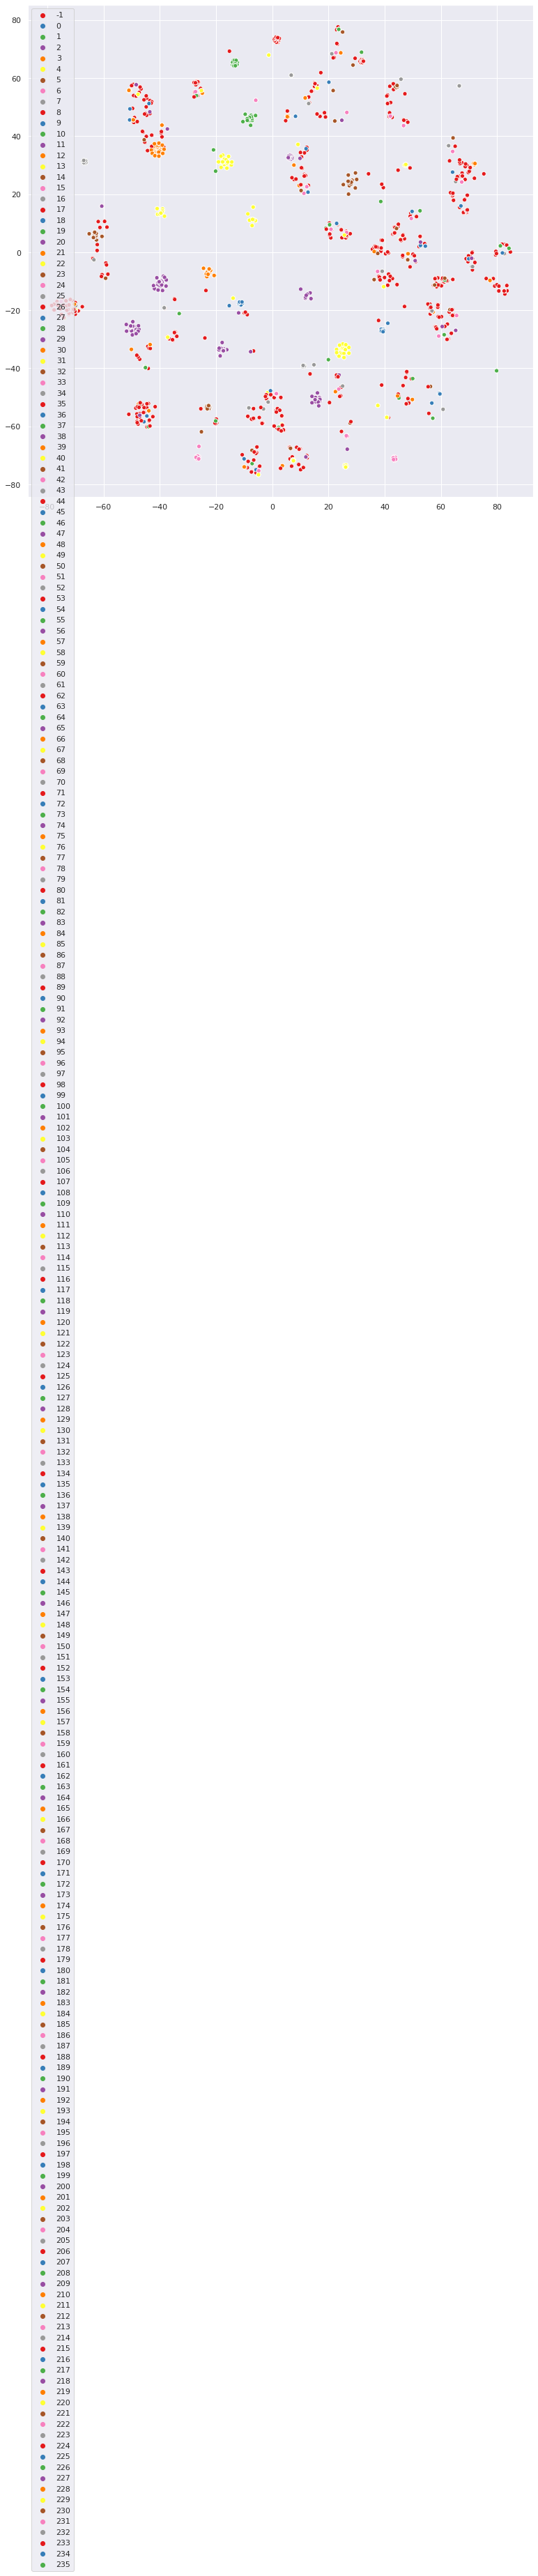

In [0]:
sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:, 1],
               hue = grupos_teste,
               palette = sns.color_palette('Set1', 237))